# Source of Dataset 
 **The IQ-OTHNCCD lung cancer dataset**
https://data.mendeley.com/datasets/bhmdr45bh2/1/

In [ ]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Getting the data from the web
import zipfile
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/bhmdr45bh2-1.zip
zip_ref = zipfile.ZipFile("/content/bhmdr45bh2-1.zip")
zip_ref.extractall()
zip_ref.close()
zip_ref = zipfile.ZipFile("/content/The IQ-OTHNCCD lung cancer dataset.zip")
zip_ref.extractall()
zip_ref.close()

--2022-06-18 04:25:57--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/bhmdr45bh2-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.52.243
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.52.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156614682 (149M) [application/octet-stream]
Saving to: ‘bhmdr45bh2-1.zip’

bhmdr45bh2-1.zip    100%[===================>] 149.36M  26.7MB/s    in 6.3s    

2022-06-18 04:26:04 (23.7 MB/s) - ‘bhmdr45bh2-1.zip’ saved [156614682/156614682]



In [ ]:
#Checking whether gpu is inserted or not
!nvidia-smi
seed=42

Sat Jun 18 04:26:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Checking the categories
import os

for dir_path , dir_folder, files in os.walk("/content/The IQ-OTHNCCD lung cancer dataset"):
  print(f"{dir_path} has {len(dir_folder)} dirs and {len(files)} files")

/content/The IQ-OTHNCCD lung cancer dataset has 3 dirs and 1 files
/content/The IQ-OTHNCCD lung cancer dataset/Malignant cases has 0 dirs and 561 files
/content/The IQ-OTHNCCD lung cancer dataset/Bengin cases has 0 dirs and 120 files
/content/The IQ-OTHNCCD lung cancer dataset/Normal cases has 0 dirs and 416 files


In [ ]:
# Creating the function to see images of specified class
import matplotlib.pyplot as plt
import random


def view_random_image(path_dir,categ):
  list_files = os.listdir(path_dir)
  file_name = random.choice(list_files)
  img_arr = plt.imread(path_dir + '/' + file_name)
  plt.imshow(img_arr)
  plt.title(categ)
  plt.axis("off")


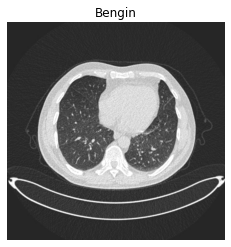

In [ ]:
# Bengin case Image study
path = '/content/The IQ-OTHNCCD lung cancer dataset/Bengin cases'
view_random_image(path_dir=path,categ='Bengin')

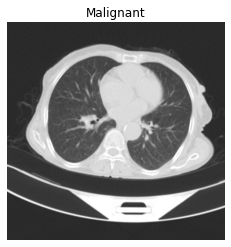

In [ ]:
path = '/content/The IQ-OTHNCCD lung cancer dataset/Malignant cases'
view_random_image(path_dir=path,categ='Malignant')

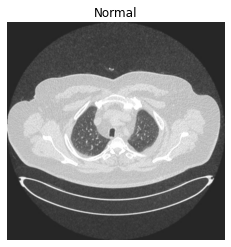

In [ ]:
path = '/content/The IQ-OTHNCCD lung cancer dataset/Normal cases'
view_random_image(path,'Normal')

In [ ]:
# Now creating training and testing data
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMAGE_SHAPE=(224,224)
BATCH_SIZE= 32

tf.random.set_seed(seed)

train_dir = '/content/The IQ-OTHNCCD lung cancer dataset'

train_datagen = image_dataset_from_directory(
    train_dir,
    image_size=IMAGE_SHAPE,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    validation_split=0.30,
    subset='training',
    seed=seed
)

test_datagen = image_dataset_from_directory(
    train_dir,
    image_size=IMAGE_SHAPE,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    validation_split=0.30,
    subset='validation',
    seed=seed
)

Found 1097 files belonging to 3 classes.
Using 768 files for training.
Found 1097 files belonging to 3 classes.
Using 329 files for validation.


In [ ]:
# function to create a model
def create_a_model():

  tf.random.set_seed(42)

  base_model = tf.keras.applications.EfficientNetV2B0(
      include_top=False
  )

  base_model.trainable = True

  x = tf.keras.Input(shape=IMAGE_SHAPE + (1,))
  x1 = base_model(x)
  x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)
  x3  = tf.keras.layers.Dense(100,activation="elu")(x2)
  output = tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x3)
  model1 = tf.keras.Model(x,output)

  model1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss= tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

  return model1

In [ ]:
model1 = create_a_model()

In [ ]:
model1.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling2d_10  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_14 (Dense)            (None, 100)               128100    
                                                                 
 output_layer (Dense)        (None, 3)                 303       
                                                                 
Total params: 6,047,715
Trainable params: 5,987,107
Non-tra

In [ ]:
# Saving the best model
checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)


In [ ]:
# Fitting the model
model1.fit(
    train_datagen,
    steps_per_epoch=len(train_datagen),
    epochs=10,
    validation_data=test_datagen,
    validation_steps=len(test_datagen),
    callbacks=[model_checkpoint_callback]
)

Epoch 1/5
24/24 [==============================] - 12s 458ms/step - loss: 0.1357 - accuracy: 0.9544 - val_loss: 0.1821 - val_accuracy: 0.9271
Epoch 2/5
24/24 [==============================] - 12s 459ms/step - loss: 0.0843 - accuracy: 0.9688 - val_loss: 0.1995 - val_accuracy: 0.9696
Epoch 3/5
24/24 [==============================] - 12s 487ms/step - loss: 0.0589 - accuracy: 0.9883 - val_loss: 0.0489 - val_accuracy: 0.9939
Epoch 4/5
24/24 [==============================] - 12s 489ms/step - loss: 0.0142 - accuracy: 0.9974 - val_loss: 0.0559 - val_accuracy: 0.9970
Epoch 5/5
24/24 [==============================] - 12s 459ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9939


In [ ]:
model_final = create_a_model()

In [ ]:
model_final.evaluate(test_datagen)

11/11 [==============================] - 5s 119ms/step - loss: 1.3628 - accuracy: 0.1976


[1.3628073930740356, 0.1975683867931366]

In [ ]:
model_final.load_weights(checkpoint_filepath)

In [ ]:
model_final.evaluate(test_datagen)

11/11 [==============================] - 2s 107ms/step - loss: 0.0490 - accuracy: 0.9970


[0.048966359347105026, 0.996960461139679]

In [ ]:
model_final.save('alpha_model_997.h5')

In [ ]:
model_final = tf.keras.models.load_model('/content/drive/MyDrive/Cancer_CT_Scan/alpha_model_997.h5') 

In [ ]:
model_final.evaluate(test_datagen)

11/11 [==============================] - 14s 99ms/step - loss: 0.0490 - accuracy: 0.9970


[0.048966288566589355, 0.996960461139679]

In [ ]:
import tensorflow as tf
y_true = []
y_pred = []
for x,y in test_datagen:
  y= tf.argmax(y,axis=1)
  y_true.append(y)
  y_pred.append(tf.argmax(model_final.predict(x),axis = 1))
  
y_pred = tf.concat(y_pred, axis=0)
y_true = tf.concat(y_true, axis=0)

In [ ]:
labels_names = test_datagen.class_names

In [ ]:
# confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def create_confusion_matrix(y_true,y_pred):

 cm = confusion_matrix(y_true, y_pred)
 plt.figure(figsize=(20,6))
 disp = ConfusionMatrixDisplay(cm,display_labels=labels_names)
 fig, ax = plt.subplots(figsize=(10,10))
 disp.plot(ax=ax)

<Figure size 1440x432 with 0 Axes>

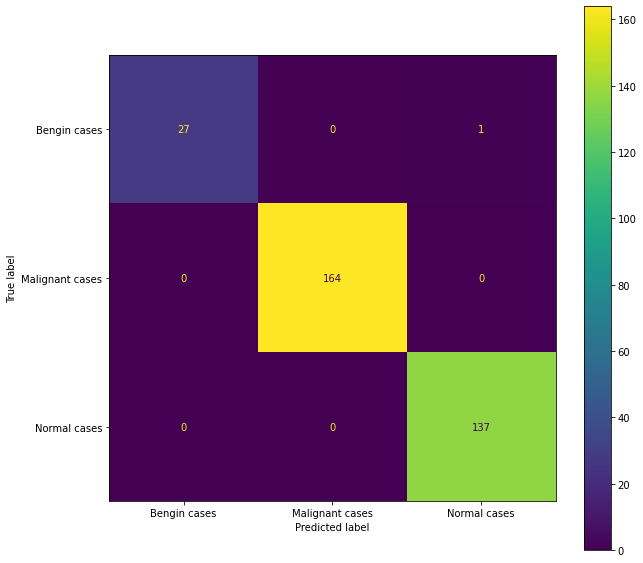

In [ ]:
# Confusion matrix created
create_confusion_matrix(y_true,y_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred,target_names=labels_names))

                 precision    recall  f1-score   support

   Bengin cases       1.00      0.96      0.98        28
Malignant cases       1.00      1.00      1.00       164
   Normal cases       0.99      1.00      1.00       137

       accuracy                           1.00       329
      macro avg       1.00      0.99      0.99       329
   weighted avg       1.00      1.00      1.00       329



# Segmentation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go

In [ ]:
filepath = '/content/Malignant case (7).jpg'

img = plt.imread(filepath)

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
img = img[:,:,0]

In [ ]:
img.shape

(512, 512)

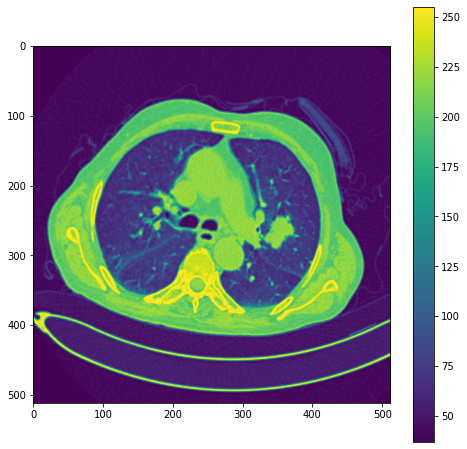

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.colorbar()

# The pixel values of this CT scan are expressed in Hounsfield Units

## Modify Data

In [ ]:
mask = img < 125

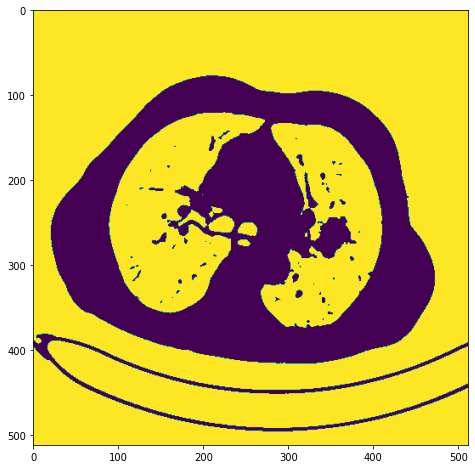

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(mask)
plt.show()

In [ ]:
mask.shape

(512, 512)

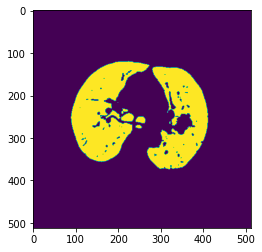

In [ ]:
mask = np.vectorize(clear_border, signature='(n,m)->(n,m)')(mask)
plt.imshow(mask)

## Now we'll give each seperate volume a different integer value using the label function

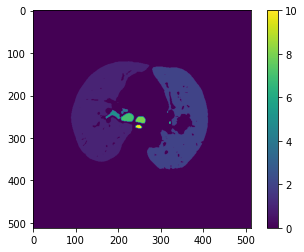

In [ ]:
mask_labeled = np.vectorize(label, signature='(n,m)->(n,m)')(mask)
plt.imshow(mask_labeled)
plt.colorbar()

In [ ]:
rps = regionprops(mask_labeled)
areas = [r.area for r in rps]
idxs = np.argsort(areas)[::-1]

In [ ]:
areas

[22180, 18963, 1, 101, 287, 6, 459, 288, 14, 95]

In [ ]:
new_slc = np.zeros_like(mask_labeled)

In [ ]:
for i in idxs[:3]:
    new_slc[tuple(rps[i].coords.T)] = i+1

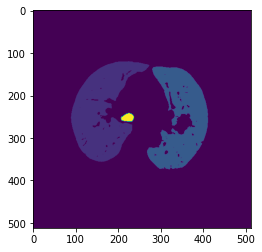

In [ ]:
plt.imshow(new_slc)

## Now lets automate this for all slices in our 3D image:

In [ ]:
def keep_top_3(slc):
    new_slc = np.zeros_like(slc)
    rps = regionprops(slc)
    areas = [r.area for r in rps]
    idxs = np.argsort(areas)[::-1]
    for i in idxs[:3]:
        new_slc[tuple(rps[i].coords.T)] = i+1
    return new_slc

In [ ]:
mask_labeled_new = np.vectorize(keep_top_3, signature='(n,m)->(n,m)')(mask_labeled)

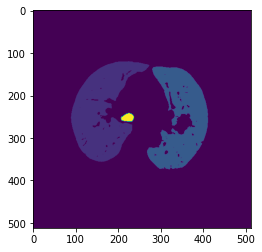

In [ ]:
plt.imshow(mask_labeled_new)

## Now lets fill in any small holes in the lungs

In [ ]:
mask = mask_labeled_new > 0

In [ ]:
mask.shape

(512, 512)

In [ ]:
mask_filled = np.vectorize(ndi.morphology.binary_fill_holes, signature='(n,m)->(n,m)')(mask)

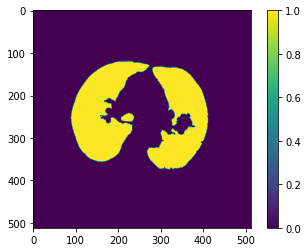

In [ ]:
plt.imshow(mask_filled)
plt.colorbar()

In [ ]:
mask_filled_1 = np.vectorize(ndi.morphology.binary_dilation,excluded=['iterations'], signature='(n,m)->(n,m)')(mask_filled,iterations=7)

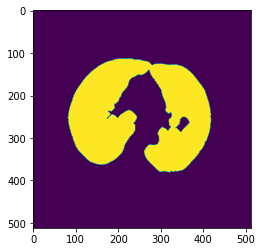

In [ ]:
plt.imshow(mask_filled_1)

In [ ]:
lungs_without_tumor = np.count_nonzero(mask_filled == True)

In [ ]:
lungs_with_tumor = np.count_nonzero(mask_filled_1 == True)

In [ ]:
percentage = ((lungs_with_tumor - lungs_without_tumor) / lungs_with_tumor) * 100 
percentage

20.892982650834167